# Tomato Leaf Classification

# Imports

In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image, ImageFile

# Constants

In [4]:
PATH = "/Users/maukanmir/Downloads/archive/"
BATCH_SIZE=64
INPUT_SHAPE = (224,224,3)

train_path, val_path, test_path = PATH +"train", PATH +"valid", PATH +"test"

# Functions

In [13]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

def load_process(img_path, target_size=INPUT_SHAPE):
  try:
    with Image.open(img_path) as img:
      img = img.resize(target_size[:2])
      img = img.convert("RGB")
      
      img_arr = np.array(img)/255.0
      img_arr = img_arr.astype(np.float32)
      return img_arr
  except IOError as e:
    print(f"This Image was not able to be processed: {e}")
    return None

def grab_images(path, size=False):
  
  images, labels = [], []
  
  for root, dirs, files in os.walk(path):
    if size and len(labels) ==10:
      break
    for file in files:
      if file.lower().endswith((".png", ".jpg", ".jpeg")):
        img_path = os.path.join(root, file)
        img = load_process(img_path)
        if img is not None:
          images.append(img)
          label = root.split(os.sep)[-1]
          labels.append(label)
  
  images, labels = np.array(images), np.array(labels)
  return images, labels

def check_class_imbalance(target):
  
  unique, counts = np.unique(target, return_counts=True)
  plt.figure(figsize=(10, 6))
  plt.pie(counts, labels=unique, autopct="%1.1f%%", startangle=140)
  plt.title("Target Class Breakdown")
  plt.show()
  
  plt.figure(figsize=(10, 6))
  sns.countplot(x=target)
  plt.title("Target Class Breakdown")
  plt.xlabel("Classes")
  plt.ylabel("Counts")
  plt.xticks(rotation=45)
  plt.show()
  

# Load Images

In [11]:
X_train, y_train = grab_images(train_path)
X_val, y_val = grab_images(val_path)
X_test, y_test = grab_images(test_path)

In [12]:
print(f"Training shape: {X_train.shape[0]}, {y_train.shape[0]}")
print(f"Validation shape: {X_val.shape[0]}, {y_val.shape[0]}")
print(f"Test shape: {X_test.shape[0]}, {y_test.shape[0]}")

Training shape: 645, 645
Validation shape: 61, 61
Test shape: 31, 31


# EDA Analysis

# Check Class Imabalance

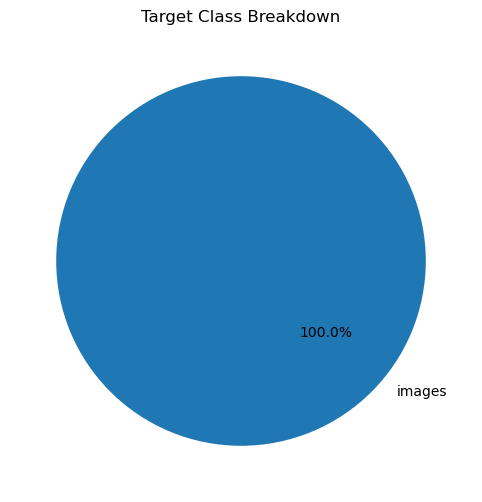

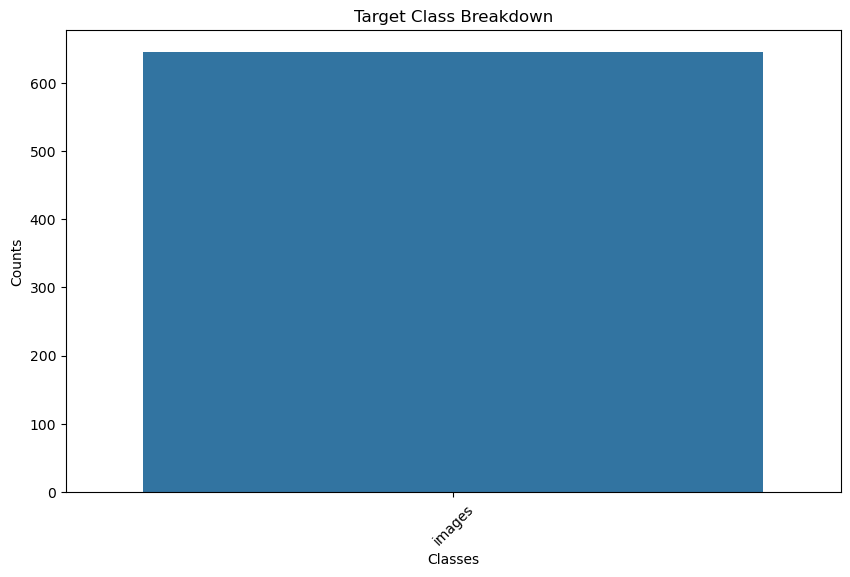

In [14]:
check_class_imbalance(y_train)